In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


The dataset used is Crowdsourced Mobile Speed from August 2021. (data.gov.in)
This dataset contains information on ISP, speed, location and signal strength information.

Hypothesis 1- Download speed is correlated to signal strength. Higher the signal strength, better the download speed.
A scatter plot of download speed v/s signal strength will help confirm this

In [2]:
'''scatter plot of speed versus signal strength'''
def scatter_plot(df):
    
    #filter all 4G download speeds with valid signal strengths
    speed_data= df.loc[(df['download'] == 'download') &  (df['technology'] == '4G') &(df['signal_strength']!='na')]
    speed_data= speed_data.sort_values(by='signal_strength',ascending=False) #
    #print(speed_data.count)
    speed_numpy=speed_data.to_numpy() #converting to numpy array for easier plotting
    speed, ssi= speed_numpy[:30000,3], speed_numpy[:30000,4] #plotting part of the data to avoid x-axis congestion
    
    #create plot
    fig1, axs= plt.subplots(1,1)
    plt.title('Download speed v/s signal strength')
    plt.xlabel('Signal Strength (dB)')
    plt.ylabel('Download speed (kBps)')
    axs.set_axisbelow(True)
    plt.scatter(ssi,speed,alpha=0.25)


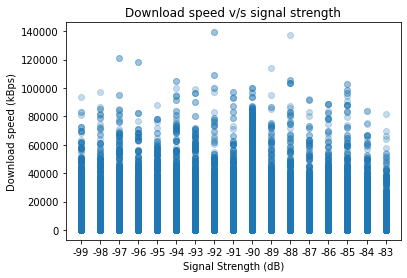

In [3]:
speed_data=pd.read_csv('August_MySpeed_2021.csv') #create a dataframe
#print(speed_data.count)
scatter_plot(speed_data)

Conclusion 1: There seems to be very little correlation between signal strength and download speeds. This could be because the network suffers from congestion, and therefore, higher signal strength doesn't give better download speeds.

Hypothesis 2-(According to general perception) Jio has the fastest data rates across India. Cellone has the slowest data rates.

In [4]:
'''box plot of 4G download speed versus operator'''
def box_plot(df):
    
    df= df.loc[(df['download'] == 'download') &  (df['technology'] == '4G')]
    #create plot
    fig1, axs= plt.subplots(1,1)
    plt.title('Download speed v/s Operator')
    plt.xlabel('Download speed (kBps)')
    plt.xlabel('Operator')
    sns.boxplot(x ='operator', y ='speed_kbps',data = df)
    plt.minorticks_on()
    plt.grid(which='major', linewidth=1.5)
    plt.grid(which='minor', linestyle=':', linewidth=1.2)

   
    
    

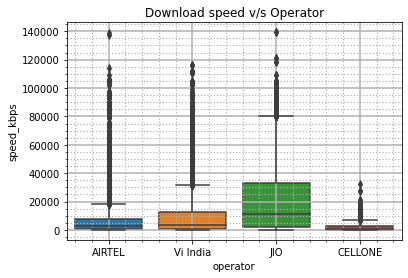

In [5]:

box_plot(speed_data)

Conclusion 2: As seen from the plot above, JIO does have the highest median download speed and highest Q3. Cellone has the lowest median and range. Although Airtel has some points at higher data rates, these are outliers.

Question 3: What is the pattern of download speeds by state(South India) and operator? People moving from one state to the other can decide whether to switch operators based on this.

In [6]:
'''Clustered bar plot of operator v/s south indian states'''
def bar_plot(df):
    
    df= df.loc[(df['lsa'] == 'Karnataka') |  (df['lsa'] == 'Kerala') | (df['lsa'] == 'Tamil Nadu') | (df['lsa'] == 'Andhra Pradesh')]
    sns.catplot(x = "lsa",  y = "speed_kbps", hue = "operator",  data = df, kind = "bar")
    plt.title('Download speed v/s State clustered by operator')
    plt.xlabel('Download speed (kBps)')
    plt.xlabel('State')


    

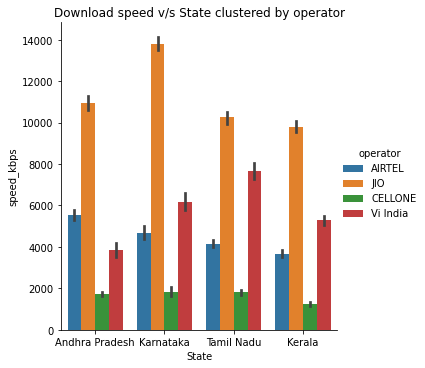

In [7]:

bar_plot(speed_data)

Conclusion 3: 
a) JIO has the download speed across South India
b) JIO, Karnataka is the fastest across South India
c) VI India is faster than Airtel in Karnataka, TN and Kerala but not in AP.
d) Cellone is the slowest operator across all states.



Data Source:https://data.gov.in/resources/all-india-crowdsourced-mobile-data-speed-measurement-august-2021